In [66]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, log_loss, confusion_matrix, precision_recall_curve, auc, accuracy_score, classification_report, roc_curve
import joblib

In [67]:
RANDOM_SEED = 42

os.environ['PYTHONHASHSEED']=str(RANDOM_SEED)

random.seed(RANDOM_SEED)

np.random.seed(RANDOM_SEED)

### Separação dos dados em:
- 70% treino
- 15% teste
- 15% validação

In [68]:
mitbih_train = pd.read_csv('mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('mitbih_test.csv', header=None)



# Variáveis para treino
X_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values

# Variáveis para teste e validação (50% teste - 50% validação)
X_test, X_val, y_test, y_val = train_test_split(mitbih_test.iloc[:, :-1].values,
                                                mitbih_test.iloc[:, -1].values,
                                                test_size=0.5,
                                                random_state=RANDOM_SEED)

#X_test = mitbih_test.iloc[:, :-1].values
#y_test = mitbih_test.iloc[:, -1].values

In [69]:

print(f"Treino: {mitbih_train.shape}")
print(f"Test: {mitbih_test.shape}")
print("-----------------")
print(f"Treino (X):", {X_train.shape})
print(f"Treino (y):", {y_train.shape})
print(f"Teste (X):", {X_test.shape})
print(f"Teste (y):", {y_test.shape})
print(f"Validação (X):", {X_val.shape})
print(f"Validação (y):", {y_val.shape})

Treino: (87554, 188)
Test: (21892, 188)
-----------------
Treino (X): {(87554, 187)}
Treino (y): {(87554,)}
Teste (X): {(10946, 187)}
Teste (y): {(10946,)}
Validação (X): {(10946, 187)}
Validação (y): {(10946,)}


In [70]:
def print_avg_and_mean(dict):
    # Ponderado
    weighted_avg_precision = dict['weighted avg']['precision']
    weighted_avg_recall = dict['weighted avg']['recall']
    weighted_avg_f1_score = dict['weighted avg']['f1-score']
    weighted_avg_support = dict['weighted avg']['support']

    # Aritmético
    mean_precision = np.mean([dict[label]["precision"] for label in dict.keys() if label != "accuracy"])
    mean_recall = np.mean([dict[label]["recall"] for label in dict.keys() if label != "accuracy"]
    )
    mean_f1_score = np.mean([dict[label]["f1-score"] for label in dict.keys() if label != "accuracy"])
    mean_support = np.mean([dict[label]["support"] for label in dict.keys() if label != "accuracy"])

    print(f'Média Ponderada - Precisão: {weighted_avg_precision}')
    print(f'Média Ponderada - Recall: {weighted_avg_recall}')
    print(f'Média Ponderada - F1-Score: {weighted_avg_f1_score}')
    print(f'Média Ponderada - Support: {weighted_avg_support}')
    print('--------------------------------------------------')
    print(f'Média Aritmética - Precisão: {mean_precision}')
    print(f'Média Aritmética - Recall: {mean_recall}')
    print(f'Média Aritmética - F1-Score: {mean_f1_score}')
    print(f'Média Aritmética - Support: {mean_support}')

Treino: 87554
Teste: 10946
Validação: 10946
Total: 109446


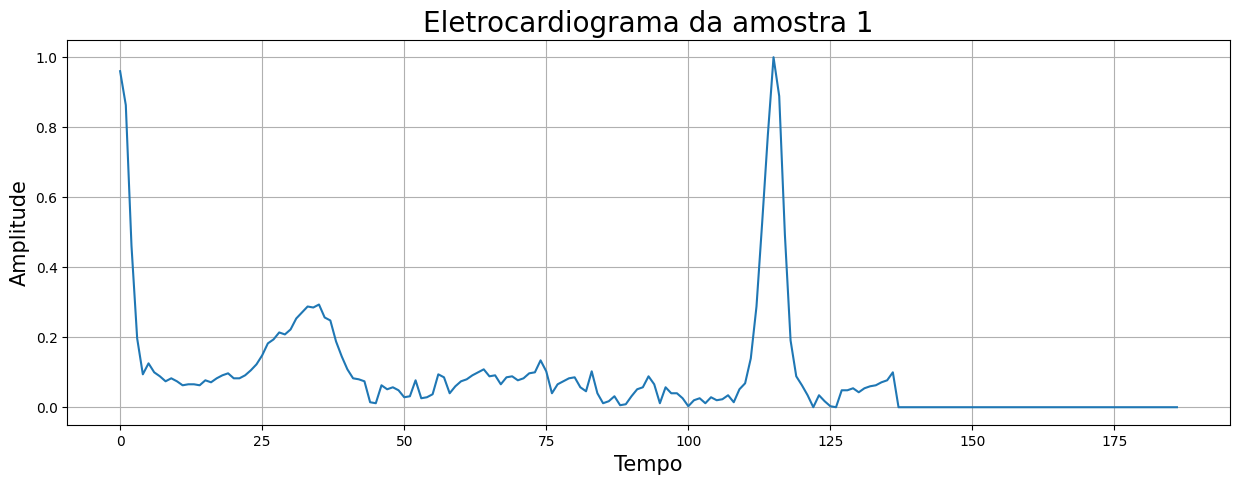

[0. 1. 2. 3. 4.]


In [71]:
index = 1 
ecg_sample = X_train[index]
print('Treino:', len(X_train))
print("Teste:", len(X_test))
print("Validação:", len(X_val))
print('Total:', len(X_train) + len(X_test) + len(X_val))

plt.figure(figsize=(15, 5))
plt.plot(ecg_sample)
plt.title(f'Eletrocardiograma da amostra {index}', fontsize=20)
plt.xlabel('Tempo', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.grid(True)
plt.show()
print(np.unique(y_train))

# Treinando modelo com seus parâmetros default

In [72]:
pipeline = make_pipeline(StandardScaler(), SVC())

pipeline.fit(X_train, y_train)

classification_report_dict = classification_report(y_test, pipeline.predict(X_test), output_dict=True)

In [73]:
print_avg_and_mean(classification_report_dict)

Média Ponderada - Precisão: 0.9678971978167614
Média Ponderada - Recall: 0.9681162068335465
Média Ponderada - F1-Score: 0.9658266926324907
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9528394802693513
Média Aritmética - Recall: 0.8107471886799864
Média Aritmética - F1-Score: 0.8670721302895255
Média Aritmética - Support: 4691.142857142857


# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’} or callable, default=’rbf’
<ul>
<li>linear</li>
<li>poly</li>
<li>rbf</li>
<li>sigmoid</li>
</ul>

In [74]:
# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Treinando com o kernel 'linear'
svc_linear = SVC(kernel='linear', random_state=RANDOM_SEED)
svc_linear.fit(X_train_scaled, y_train)

# Avaliando no conjunto de validação
y_val_pred_linear = svc_linear.predict(X_val_scaled)
classification_report_linear_val = classification_report(y_val, y_val_pred_linear, output_dict=True)

# Avaliando no conjunto de teste
y_test_pred_linear = svc_linear.predict(X_test_scaled)
classification_report_linear_test = classification_report(y_test, y_test_pred_linear, output_dict=True)

# Exibindo os resultados
print("Relatório de Classificação - Validação (Kernel Linear)")
print(classification_report(y_val, y_val_pred_linear))

print("Relatório de Classificação - Teste (Kernel Linear)")
print(classification_report(y_test, y_test_pred_linear))


Relatório de Classificação - Validação (Kernel Linear)
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      9106
         1.0       0.90      0.52      0.66       267
         2.0       0.79      0.28      0.41       694
         3.0       0.57      0.33      0.42        84
         4.0       0.97      0.87      0.92       795

    accuracy                           0.92     10946
   macro avg       0.83      0.60      0.67     10946
weighted avg       0.92      0.92      0.91     10946

Relatório de Classificação - Teste (Kernel Linear)
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      9012
         1.0       0.91      0.46      0.61       289
         2.0       0.84      0.29      0.43       754
         3.0       0.68      0.49      0.57        78
         4.0       0.99      0.87      0.93       813

    accuracy                           0.92     10946
   macro avg       0.87  

In [75]:
print_avg_and_mean(classification_report_linear_val)

Média Ponderada - Precisão: 0.9159397481006952
Média Ponderada - Recall: 0.9224374200621231
Média Ponderada - F1-Score: 0.9085770153568701
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.8441398893939364
Média Aritmética - Recall: 0.6442894525154775
Média Aritmética - F1-Score: 0.706465082757959
Média Aritmética - Support: 4691.142857142857


In [76]:
print_avg_and_mean(classification_report_linear_test)

Média Ponderada - Precisão: 0.9165747212033708
Média Ponderada - Recall: 0.9197880504293806
Média Ponderada - F1-Score: 0.9051408427686151
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.8756448325658884
Média Aritmética - Recall: 0.6631169108354504
Média Aritmética - F1-Score: 0.7278185569067207
Média Aritmética - Support: 4691.142857142857


In [77]:
# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_test_pred_linear)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean = np.mean(specificities)
print(f"Especificidade Média do Kernel Linear: {specificity_mean:.4f}")

Especificidade Média do Kernel Linear: 0.9157


In [78]:
# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_val_pred_linear)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean = np.mean(specificities)
print(f"Especificidade Média do Kernel Linear: {specificity_mean:.4f}")

Especificidade Média do Kernel Linear: 0.8015


## Poly

In [79]:
# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Treinando com o kernel 'poly'
svc_poly = SVC(kernel='poly', random_state=RANDOM_SEED)
svc_poly.fit(X_train_scaled, y_train)

# Avaliando no conjunto de validação
y_val_pred_poly = svc_poly.predict(X_val_scaled)
classification_report_poly_val = classification_report(y_val, y_val_pred_poly, output_dict=True)

# Avaliando no conjunto de teste
y_test_pred_poly = svc_poly.predict(X_test_scaled)
classification_report_poly_test = classification_report(y_test, y_test_pred_poly, output_dict=True)

# Exibindo os resultados
print("Relatório de Classificação - Validação (Kernel Poly)")
print(classification_report(y_val, y_val_pred_poly))

print("Relatório de Classificação - Teste (Kernel Poly)")
print(classification_report(y_test, y_test_pred_poly))


Relatório de Classificação - Validação (Kernel Poly)
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      9106
         1.0       0.97      0.57      0.72       267
         2.0       0.95      0.78      0.86       694
         3.0       0.61      0.30      0.40        84
         4.0       1.00      0.88      0.94       795

    accuracy                           0.96     10946
   macro avg       0.90      0.70      0.78     10946
weighted avg       0.96      0.96      0.96     10946

Relatório de Classificação - Teste (Kernel Poly)
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      9012
         1.0       0.93      0.52      0.66       289
         2.0       0.97      0.77      0.86       754
         3.0       0.74      0.40      0.52        78
         4.0       0.99      0.87      0.93       813

    accuracy                           0.96     10946
   macro avg       0.92      

In [80]:
print_avg_and_mean(classification_report_poly_test)

Média Ponderada - Precisão: 0.9555872931334799
Média Ponderada - Recall: 0.9559656495523479
Média Ponderada - F1-Score: 0.9522938019928119
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9226880144181792
Média Aritmética - Recall: 0.7451213396673199
Média Aritmética - F1-Score: 0.8115827390435164
Média Aritmética - Support: 4691.142857142857


In [81]:
print_avg_and_mean(classification_report_poly_val)

Média Ponderada - Precisão: 0.9585081025149456
Média Ponderada - Recall: 0.9594372373469761
Média Ponderada - F1-Score: 0.9561011343633206
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9072400373238025
Média Aritmética - Recall: 0.7410385912399073
Média Aritmética - F1-Score: 0.8030604473333681
Média Aritmética - Support: 4691.142857142857


In [82]:
# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_test_pred_linear)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean = np.mean(specificities)
print(f"Especificidade Média do Kernel Linear: {specificity_mean:.4f}")

Especificidade Média do Kernel Linear: 0.9157


In [83]:
# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_val_pred_linear)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean = np.mean(specificities)
print(f"Especificidade Média do Kernel Linear: {specificity_mean:.4f}")

Especificidade Média do Kernel Linear: 0.8015


## Rbf

In [84]:
# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Treinando com o kernel 'rbf'
svc_rbf = SVC(kernel='rbf', random_state=RANDOM_SEED)
svc_rbf.fit(X_train_scaled, y_train)

# Avaliando no conjunto de validação
y_val_pred_rbf = svc_rbf.predict(X_val_scaled)
classification_report_rbf_val = classification_report(y_val, y_val_pred_rbf, output_dict=True)

# Avaliando no conjunto de teste
y_test_pred_rbf = svc_rbf.predict(X_test_scaled)
classification_report_rbf_test = classification_report(y_test, y_test_pred_rbf, output_dict=True)

# Exibindo os resultados
print("Relatório de Classificação - Validação (Kernel RBF)")
print(classification_report(y_val, y_val_pred_rbf))

print("Relatório de Classificação - Teste (Kernel RBF)")
print(classification_report(y_test, y_test_pred_rbf))


Relatório de Classificação - Validação (Kernel RBF)
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      9106
         1.0       0.97      0.59      0.73       267
         2.0       0.95      0.88      0.91       694
         3.0       0.71      0.43      0.53        84
         4.0       0.99      0.91      0.95       795

    accuracy                           0.97     10946
   macro avg       0.92      0.76      0.82     10946
weighted avg       0.97      0.97      0.97     10946

Relatório de Classificação - Teste (Kernel RBF)
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      9012
         1.0       0.95      0.54      0.69       289
         2.0       0.97      0.86      0.91       754
         3.0       0.87      0.60      0.71        78
         4.0       1.00      0.92      0.96       813

    accuracy                           0.97     10946
   macro avg       0.95      0.

In [85]:
print_avg_and_mean(classification_report_rbf_test)

Média Ponderada - Precisão: 0.9678971978167614
Média Ponderada - Recall: 0.9681162068335465
Média Ponderada - F1-Score: 0.9658266926324907
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9528394802693513
Média Aritmética - Recall: 0.8107471886799864
Média Aritmética - F1-Score: 0.8670721302895255
Média Aritmética - Support: 4691.142857142857


In [86]:
print_avg_and_mean(classification_report_rbf_val)

Média Ponderada - Precisão: 0.9690130882847211
Média Ponderada - Recall: 0.9697606431573177
Média Ponderada - F1-Score: 0.9676047568492085
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.926042467403236
Média Aritmética - Recall: 0.7910590196105508
Média Aritmética - F1-Score: 0.8438919993672312
Média Aritmética - Support: 4691.142857142857


In [87]:
# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_test_pred_linear)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean = np.mean(specificities)
print(f"Especificidade Média do Kernel Linear: {specificity_mean:.4f}")

Especificidade Média do Kernel Linear: 0.9157


In [88]:
# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_val_pred_linear)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean = np.mean(specificities)
print(f"Especificidade Média do Kernel Linear: {specificity_mean:.4f}")

Especificidade Média do Kernel Linear: 0.8015


## Sigmoid

In [89]:
# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Treinando com o kernel 'sigmoid'
svc_sigmoid = SVC(kernel='sigmoid', random_state=RANDOM_SEED)
svc_sigmoid.fit(X_train_scaled, y_train)

# Avaliando no conjunto de validação
y_val_pred_sigmoid = svc_sigmoid.predict(X_val_scaled)
classification_report_sigmoid_val = classification_report(y_val, y_val_pred_sigmoid, output_dict=True)

# Avaliando no conjunto de teste
y_test_pred_sigmoid = svc_sigmoid.predict(X_test_scaled)
classification_report_sigmoid_test = classification_report(y_test, y_test_pred_sigmoid, output_dict=True)

# Exibindo os resultados
print("Relatório de Classificação - Validação (Kernel Sigmoid)")
print(classification_report(y_val, y_val_pred_sigmoid))

print("Relatório de Classificação - Teste (Kernel Sigmoid)")
print(classification_report(y_test, y_test_pred_sigmoid))


Relatório de Classificação - Validação (Kernel Sigmoid)
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      9106
         1.0       0.05      0.06      0.05       267
         2.0       0.18      0.07      0.10       694
         3.0       0.13      0.11      0.12        84
         4.0       0.39      0.23      0.29       795

    accuracy                           0.79     10946
   macro avg       0.32      0.28      0.29     10946
weighted avg       0.75      0.79      0.77     10946

Relatório de Classificação - Teste (Kernel Sigmoid)
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      9012
         1.0       0.06      0.06      0.06       289
         2.0       0.18      0.06      0.10       754
         3.0       0.26      0.26      0.26        78
         4.0       0.43      0.25      0.32       813

    accuracy                           0.79     10946
   macro avg       0.35

In [90]:
print_avg_and_mean(classification_report_rbf_test)

Média Ponderada - Precisão: 0.9678971978167614
Média Ponderada - Recall: 0.9681162068335465
Média Ponderada - F1-Score: 0.9658266926324907
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9528394802693513
Média Aritmética - Recall: 0.8107471886799864
Média Aritmética - F1-Score: 0.8670721302895255
Média Aritmética - Support: 4691.142857142857


In [91]:
print_avg_and_mean(classification_report_rbf_val)

Média Ponderada - Precisão: 0.9690130882847211
Média Ponderada - Recall: 0.9697606431573177
Média Ponderada - F1-Score: 0.9676047568492085
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.926042467403236
Média Aritmética - Recall: 0.7910590196105508
Média Aritmética - F1-Score: 0.8438919993672312
Média Aritmética - Support: 4691.142857142857


In [92]:
# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_test_pred_linear)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean = np.mean(specificities)
print(f"Especificidade Média do Kernel Linear: {specificity_mean:.4f}")

Especificidade Média do Kernel Linear: 0.9157


In [93]:
# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_val_pred_linear)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean = np.mean(specificities)
print(f"Especificidade Média do Kernel Linear: {specificity_mean:.4f}")

Especificidade Média do Kernel Linear: 0.8015


In [94]:
table_data_test = [
    ['linear', 
     classification_report_linear_test['weighted avg']['precision'],
     classification_report_linear_test['weighted avg']['recall'],
     classification_report_linear_test['weighted avg']['f1-score'],
     classification_report_linear_test['weighted avg']['support'],
     classification_report_linear_test['macro avg']['precision'],
     classification_report_linear_test['macro avg']['recall'],
     classification_report_linear_test['macro avg']['f1-score'],
     classification_report_linear_test['macro avg']['support']
    ],
    ['poly', 
     classification_report_poly_test['weighted avg']['precision'],
     classification_report_poly_test['weighted avg']['recall'],
     classification_report_poly_test['weighted avg']['f1-score'],
     classification_report_poly_test['weighted avg']['support'],
     classification_report_poly_test['macro avg']['precision'],
     classification_report_poly_test['macro avg']['recall'],
     classification_report_poly_test['macro avg']['f1-score'],
     classification_report_poly_test['macro avg']['support']
    ],
    ['rbf', 
     classification_report_rbf_test['weighted avg']['precision'],
     classification_report_rbf_test['weighted avg']['recall'],
     classification_report_rbf_test['weighted avg']['f1-score'],
     classification_report_rbf_test['weighted avg']['support'],
     classification_report_rbf_test['macro avg']['precision'],
     classification_report_rbf_test['macro avg']['recall'],
     classification_report_rbf_test['macro avg']['f1-score'],
     classification_report_rbf_test['macro avg']['support']
    ],
    ['sigmoid', 
     classification_report_sigmoid_test['weighted avg']['precision'],
     classification_report_sigmoid_test['weighted avg']['recall'],
     classification_report_sigmoid_test['weighted avg']['f1-score'],
     classification_report_sigmoid_test['weighted avg']['support'],
     classification_report_sigmoid_test['macro avg']['precision'],
     classification_report_sigmoid_test['macro avg']['recall'],
     classification_report_sigmoid_test['macro avg']['f1-score'],
     classification_report_sigmoid_test['macro avg']['support']
    ]
]

headers = [
    "Kernel",
    "Ponderada - Precisão", "Ponderada - Recall", "Ponderada - F1-Score", "Ponderada - Suporte",
    "Aritmética - Precisão", "Aritmética - Recall", "Aritmética - F1-Score", "Aritmética - Suporte"
]


In [95]:
table_data_val = [
    ['linear', 
     classification_report_linear_val['weighted avg']['precision'],
     classification_report_linear_val['weighted avg']['recall'],
     classification_report_linear_val['weighted avg']['f1-score'],
     classification_report_linear_val['weighted avg']['support'],
     classification_report_linear_val['macro avg']['precision'],
     classification_report_linear_val['macro avg']['recall'],
     classification_report_linear_val['macro avg']['f1-score'],
     classification_report_linear_val['macro avg']['support']
    ],
    ['poly', 
     classification_report_poly_val['weighted avg']['precision'],
     classification_report_poly_val['weighted avg']['recall'],
     classification_report_poly_val['weighted avg']['f1-score'],
     classification_report_poly_val['weighted avg']['support'],
     classification_report_poly_val['macro avg']['precision'],
     classification_report_poly_val['macro avg']['recall'],
     classification_report_poly_val['macro avg']['f1-score'],
     classification_report_poly_val['macro avg']['support']
    ],
    ['rbf', 
     classification_report_rbf_val['weighted avg']['precision'],
     classification_report_rbf_val['weighted avg']['recall'],
     classification_report_rbf_val['weighted avg']['f1-score'],
     classification_report_rbf_val['weighted avg']['support'],
     classification_report_rbf_val['macro avg']['precision'],
     classification_report_rbf_val['macro avg']['recall'],
     classification_report_rbf_val['macro avg']['f1-score'],
     classification_report_rbf_val['macro avg']['support']
    ],
    ['sigmoid', 
     classification_report_sigmoid_val['weighted avg']['precision'],
     classification_report_sigmoid_val['weighted avg']['recall'],
     classification_report_sigmoid_val['weighted avg']['f1-score'],
     classification_report_sigmoid_val['weighted avg']['support'],
     classification_report_sigmoid_val['macro avg']['precision'],
     classification_report_sigmoid_val['macro avg']['recall'],
     classification_report_sigmoid_val['macro avg']['f1-score'],
     classification_report_sigmoid_val['macro avg']['support']
    ]
]

headers = [
    "Kernel",
    "Ponderada - Precisão", "Ponderada - Recall", "Ponderada - F1-Score", "Ponderada - Suporte",
    "Aritmética - Precisão", "Aritmética - Recall", "Aritmética - F1-Score", "Aritmética - Suporte"
]


In [96]:
print(tabulate(table_data_test, headers=headers, floatfmt=".2f"))

Kernel      Ponderada - Precisão    Ponderada - Recall    Ponderada - F1-Score    Ponderada - Suporte    Aritmética - Precisão    Aritmética - Recall    Aritmética - F1-Score    Aritmética - Suporte
--------  ----------------------  --------------------  ----------------------  ---------------------  -----------------------  ---------------------  -----------------------  ----------------------
linear                      0.92                  0.92                    0.91               10946.00                     0.87                   0.62                     0.70                10946.00
poly                        0.96                  0.96                    0.95               10946.00                     0.92                   0.71                     0.79                10946.00
rbf                         0.97                  0.97                    0.97               10946.00                     0.95                   0.78                     0.85                10946.00
sigmo

In [97]:
print(tabulate(table_data_val, headers=headers, floatfmt=".2f"))

Kernel      Ponderada - Precisão    Ponderada - Recall    Ponderada - F1-Score    Ponderada - Suporte    Aritmética - Precisão    Aritmética - Recall    Aritmética - F1-Score    Aritmética - Suporte
--------  ----------------------  --------------------  ----------------------  ---------------------  -----------------------  ---------------------  -----------------------  ----------------------
linear                      0.92                  0.92                    0.91               10946.00                     0.83                   0.60                     0.67                10946.00
poly                        0.96                  0.96                    0.96               10946.00                     0.90                   0.70                     0.78                10946.00
rbf                         0.97                  0.97                    0.97               10946.00                     0.92                   0.76                     0.82                10946.00
sigmo

### Melhor resultado foi kenel=rbf

# gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
<ul>
<li>if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,</li>

<li>if ‘auto’, uses 1 / n_features</li>

<li>if float, must be non-negative.</li>
</ul>

In [98]:
pipeline_rbf_scale = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='scale'))
pipeline_rbf_scale.fit(X_train, y_train)
classification_report_dict_linear_scale = classification_report(y_test, pipeline_rbf_scale.predict(X_test), output_dict=True)

In [99]:
print_avg_and_mean(classification_report_dict_linear_scale)

Média Ponderada - Precisão: 0.9678971978167614
Média Ponderada - Recall: 0.9681162068335465
Média Ponderada - F1-Score: 0.9658266926324907
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9528394802693513
Média Aritmética - Recall: 0.8107471886799864
Média Aritmética - F1-Score: 0.8670721302895255
Média Aritmética - Support: 4691.142857142857


In [100]:
y_pred_rbf_scale = pipeline_rbf_scale.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rbf_scale)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP)
    specificities.append(specificity)
specificity_mean = np.mean(specificities)
print(f"Especificidade Média do scale: {specificity_mean:.4f}")

Especificidade Média do scale: 0.9670


In [101]:
pipeline_kbf_auto = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
pipeline_kbf_auto.fit(X_train, y_train)
classification_report_dict_kbf_auto = classification_report(y_test, pipeline_kbf_auto.predict(X_test), output_dict=True)

In [102]:
print_avg_and_mean(classification_report_dict_kbf_auto)

Média Ponderada - Precisão: 0.9678971978167614
Média Ponderada - Recall: 0.9681162068335465
Média Ponderada - F1-Score: 0.9658266926324907
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9528394802693513
Média Aritmética - Recall: 0.8107471886799864
Média Aritmética - F1-Score: 0.8670721302895255
Média Aritmética - Support: 4691.142857142857


In [103]:
y_pred_rbf_auto = pipeline_kbf_auto.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rbf_auto)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP)
    specificities.append(specificity)
specificity_mean = np.mean(specificities)
print(f"Especificidade Média do auto: {specificity_mean:.4f}")

Especificidade Média do auto: 0.9670


In [104]:
table_data = [
    ['scale', 
     classification_report_dict_linear_scale['weighted avg']['precision'],
     classification_report_dict_linear_scale['weighted avg']['recall'],
     classification_report_dict_linear_scale['weighted avg']['f1-score'],
     classification_report_dict_linear_scale['weighted avg']['support'],
     classification_report_dict_linear_scale['macro avg']['precision'],
     classification_report_dict_linear_scale['macro avg']['recall'],
     classification_report_dict_linear_scale['macro avg']['f1-score'],
     classification_report_dict_linear_scale['macro avg']['support']
    ],
    ['auto', 
     classification_report_dict_kbf_auto['weighted avg']['precision'],
     classification_report_dict_kbf_auto['weighted avg']['recall'],
     classification_report_dict_kbf_auto['weighted avg']['f1-score'],
     classification_report_dict_kbf_auto['weighted avg']['support'],
     classification_report_dict_kbf_auto['macro avg']['precision'],
     classification_report_dict_kbf_auto['macro avg']['recall'],
     classification_report_dict_kbf_auto['macro avg']['f1-score'],
     classification_report_dict_kbf_auto['macro avg']['support']
    ]
]

headers = [
    "gamma",
    "Ponderada - Precisão", "Ponderada - Recall", "Ponderada - F1-Score", "Ponderada - Suporte",
    "Aritmética - Precisão", "Aritmética - Recall", "Aritmética - F1-Score", "Aritmética - Suporte"
]


In [105]:
print(tabulate(table_data, headers=headers, floatfmt=".2f"))

gamma      Ponderada - Precisão    Ponderada - Recall    Ponderada - F1-Score    Ponderada - Suporte    Aritmética - Precisão    Aritmética - Recall    Aritmética - F1-Score    Aritmética - Suporte
-------  ----------------------  --------------------  ----------------------  ---------------------  -----------------------  ---------------------  -----------------------  ----------------------
scale                      0.97                  0.97                    0.97               10946.00                     0.95                   0.78                     0.85                10946.00
auto                       0.97                  0.97                    0.97               10946.00                     0.95                   0.78                     0.85                10946.00


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Treinando com o kernel 'rbf' e gamma='scale'
svc_rbf_scale = SVC(kernel='rbf', gamma='scale', random_state=RANDOM_SEED)
svc_rbf_scale.fit(X_train_scaled, y_train)

# Avaliando no conjunto de validação
y_val_pred_rbf_scale = svc_rbf_scale.predict(X_val_scaled)
classification_report_rbf_val_scale = classification_report(y_val, y_val_pred_rbf_scale, output_dict=True)

# Avaliando no conjunto de teste
y_test_pred_rbf_scale = svc_rbf_scale.predict(X_test_scaled)
classification_report_rbf_test_scale = classification_report(y_test, y_test_pred_rbf_scale, output_dict=True)

# Exibindo os resultados
print("Relatório de Classificação - Validação (Kernel RBF, gamma='scale')")
print(classification_report(y_val, y_val_pred_rbf_scale))

print("Relatório de Classificação - Teste (Kernel RBF, gamma='scale')")
print(classification_report(y_test, y_test_pred_rbf_scale))

# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_test_pred_rbf_scale)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean_scale = np.mean(specificities)
print(f"Especificidade Média do Kernel RBF (gamma='scale'): {specificity_mean_scale:.4f}")

# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_val_pred_rbf_auto)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean_auto = np.mean(specificities)
print(f"Especificidade Média do Kernel RBF (gamma='auto'): {specificity_mean_auto:.4f}")


Relatório de Classificação - Validação (Kernel RBF, gamma='scale')
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      9106
         1.0       0.97      0.59      0.73       267
         2.0       0.95      0.88      0.91       694
         3.0       0.71      0.43      0.53        84
         4.0       0.99      0.91      0.95       795

    accuracy                           0.97     10946
   macro avg       0.92      0.76      0.82     10946
weighted avg       0.97      0.97      0.97     10946

Relatório de Classificação - Teste (Kernel RBF, gamma='scale')
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      9012
         1.0       0.95      0.54      0.69       289
         2.0       0.97      0.86      0.91       754
         3.0       0.87      0.60      0.71        78
         4.0       1.00      0.92      0.96       813

    accuracy                           0.97     10946
 

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Treinando com o kernel 'rbf' e gamma='auto'
svc_rbf_auto = SVC(kernel='rbf', gamma='auto', random_state=RANDOM_SEED)
svc_rbf_auto.fit(X_train_scaled, y_train)

# Avaliando no conjunto de validação
y_val_pred_rbf_auto = svc_rbf_auto.predict(X_val_scaled)
classification_report_rbf_val_auto = classification_report(y_val, y_val_pred_rbf_auto, output_dict=True)

# Avaliando no conjunto de teste
y_test_pred_rbf_auto = svc_rbf_auto.predict(X_test_scaled)
classification_report_rbf_test_auto = classification_report(y_test, y_test_pred_rbf_auto, output_dict=True)

# Exibindo os resultados
print("Relatório de Classificação - Validação (Kernel RBF, gamma='auto')")
print(classification_report(y_val, y_val_pred_rbf_auto))

print("Relatório de Classificação - Teste (Kernel RBF, gamma='auto')")
print(classification_report(y_test, y_test_pred_rbf_auto))

# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_test_pred_rbf_auto)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean_auto = np.mean(specificities)
print(f"Especificidade Média do Kernel RBF (gamma='auto'): {specificity_mean_auto:.4f}")

# Cálculo da Especificidade
cm = confusion_matrix(y_test, y_val_pred_rbf_auto)
specificities = []
for i in range(len(cm)):
    TN = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Calculando a especificidade média
specificity_mean_auto = np.mean(specificities)
print(f"Especificidade Média do Kernel RBF (gamma='auto'): {specificity_mean_auto:.4f}")


Relatório de Classificação - Validação (Kernel RBF, gamma='auto')
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      9106
         1.0       0.97      0.59      0.73       267
         2.0       0.95      0.88      0.91       694
         3.0       0.71      0.43      0.53        84
         4.0       0.99      0.91      0.95       795

    accuracy                           0.97     10946
   macro avg       0.92      0.76      0.82     10946
weighted avg       0.97      0.97      0.97     10946

Relatório de Classificação - Teste (Kernel RBF, gamma='auto')
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      9012
         1.0       0.95      0.54      0.69       289
         2.0       0.97      0.86      0.91       754
         3.0       0.87      0.60      0.71        78
         4.0       1.00      0.92      0.96       813

    accuracy                           0.97     10946
   

In [108]:
print("classification_report_rbf_test_auto")
print("-----------------------------------")
print_avg_and_mean(classification_report_rbf_test_auto)

classification_report_rbf_test_auto
-----------------------------------
Média Ponderada - Precisão: 0.9678971978167614
Média Ponderada - Recall: 0.9681162068335465
Média Ponderada - F1-Score: 0.9658266926324907
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9528394802693513
Média Aritmética - Recall: 0.8107471886799864
Média Aritmética - F1-Score: 0.8670721302895255
Média Aritmética - Support: 4691.142857142857


In [109]:
print("classification_report_rbf_val_auto")
print("-----------------------------------")
print_avg_and_mean(classification_report_rbf_val_auto)

classification_report_rbf_val_auto
-----------------------------------
Média Ponderada - Precisão: 0.9690130882847211
Média Ponderada - Recall: 0.9697606431573177
Média Ponderada - F1-Score: 0.9676047568492085
Média Ponderada - Support: 10946.0
--------------------------------------------------
Média Aritmética - Precisão: 0.926042467403236
Média Aritmética - Recall: 0.7910590196105508
Média Aritmética - F1-Score: 0.8438919993672312
Média Aritmética - Support: 4691.142857142857


### Melhor gamma = [scale, auto]
####  - Ambos os gamma obtiveram um bons desempenhos

# C : float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty. For an intuitive visualization of the effects of scaling the regularization parameter C, see Scaling the regularization parameter for SVCs.

In [110]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Configurando o pipeline com StandardScaler e SVC
pipeline = make_pipeline(StandardScaler(), SVC())

# Definindo a grade de parâmetros para o GridSearchCV
param_grid = {
    'svc__C': [50, 75, 100, 125, 150],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf']
}

# Configurando o GridSearchCV
grid_search2 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Treinando o modelo com GridSearchCV
grid_search2.fit(X_train, y_train)

# Exibindo os melhores hiperparâmetros encontrados
print(f"Melhores hiperparâmetros: {grid_search2.best_params_}")

# Fazendo previsões com o melhor modelo no conjunto de teste
y_pred_test = grid_search2.predict(X_test)

# Gerando o relatório de classificação para o conjunto de teste
classification_report_test = classification_report(y_test, y_pred_test, output_dict=True)
print("Relatório de Classificação - Teste")
print(classification_report(y_test, y_pred_test))

# Fazendo previsões com o melhor modelo no conjunto de validação
y_pred_val = grid_search2.predict(X_val)

# Gerando o relatório de classificação para o conjunto de validação
classification_report_val = classification_report(y_val, y_pred_val, output_dict=True)
print("Relatório de Classificação - Validação")
print(classification_report(y_val, y_pred_val))

# Cálculo da Especificidade para o melhor modelo no conjunto de teste
cm_test = confusion_matrix(y_test, y_pred_test)
specificities_test = []
for i in range(len(cm_test)):
    TN = np.sum(cm_test) - np.sum(cm_test[i, :]) - np.sum(cm_test[:, i]) + cm_test[i, i]
    FP = np.sum(cm_test[:, i]) - cm_test[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_test.append(specificity)

# Calculando a especificidade média para o conjunto de teste
specificity_mean_test = np.mean(specificities_test)
print(f"Especificidade Média do Melhor Modelo (Teste): {specificity_mean_test:.4f}")

# Cálculo da Especificidade para o melhor modelo no conjunto de validação
cm_val = confusion_matrix(y_val, y_pred_val)
specificities_val = []
for i in range(len(cm_val)):
    TN = np.sum(cm_val) - np.sum(cm_val[i, :]) - np.sum(cm_val[:, i]) + cm_val[i, i]
    FP = np.sum(cm_val[:, i]) - cm_val[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_val.append(specificity)

# Calculando a especificidade média para o conjunto de validação
specificity_mean_val = np.mean(specificities_val)
print(f"Especificidade Média do Melhor Modelo (Validação): {specificity_mean_val:.4f}")

Melhores hiperparâmetros: {'svc__C': 75, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Relatório de Classificação - Teste
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9012
         1.0       0.93      0.71      0.81       289
         2.0       0.97      0.93      0.95       754
         3.0       0.86      0.79      0.83        78
         4.0       0.99      0.98      0.99       813

    accuracy                           0.98     10946
   macro avg       0.95      0.88      0.91     10946
weighted avg       0.98      0.98      0.98     10946

Relatório de Classificação - Validação
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9106
         1.0       0.92      0.70      0.79       267
         2.0       0.95      0.94      0.94       694
         3.0       0.81      0.67      0.73        84
         4.0       0.99      0.97      0.98       795

    accuracy             

# shrinkingbool, default=True
Whether to use the shrinking heuristic. See the User Guide.

In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Configurando o pipeline com StandardScaler e SVC
pipeline = make_pipeline(StandardScaler(), SVC())

# Definindo a grade de parâmetros para o GridSearchCV
param_grid = {
    'svc__C': [75],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf'],
    'svc__shrinking': [True, False]
}

# Configurando o GridSearchCV
grid_search3 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Treinando o modelo com GridSearchCV
grid_search3.fit(X_train, y_train)

# Exibindo os melhores hiperparâmetros encontrados
print(f"Melhores hiperparâmetros: {grid_search3.best_params_}")

# Fazendo previsões com o melhor modelo no conjunto de teste
y_pred_test = grid_search3.predict(X_test)

# Gerando o relatório de classificação para o conjunto de teste
classification_report_test = classification_report(y_test, y_pred_test, output_dict=True)
print("Relatório de Classificação - Teste")
print(classification_report(y_test, y_pred_test))

# Fazendo previsões com o melhor modelo no conjunto de validação
y_pred_val = grid_search3.predict(X_val)

# Gerando o relatório de classificação para o conjunto de validação
classification_report_val = classification_report(y_val, y_pred_val, output_dict=True)
print("Relatório de Classificação - Validação")
print(classification_report(y_val, y_pred_val))

# Cálculo da Especificidade para o melhor modelo no conjunto de teste
cm_test = confusion_matrix(y_test, y_pred_test)
specificities_test = []
for i in range(len(cm_test)):
    TN = np.sum(cm_test) - np.sum(cm_test[i, :]) - np.sum(cm_test[:, i]) + cm_test[i, i]
    FP = np.sum(cm_test[:, i]) - cm_test[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_test.append(specificity)

# Calculando a especificidade média para o conjunto de teste
specificity_mean_test = np.mean(specificities_test)
print(f"Especificidade Média do Melhor Modelo (Teste): {specificity_mean_test:.4f}")

# Cálculo da Especificidade para o melhor modelo no conjunto de validação
cm_val = confusion_matrix(y_val, y_pred_val)
specificities_val = []
for i in range(len(cm_val)):
    TN = np.sum(cm_val) - np.sum(cm_val[i, :]) - np.sum(cm_val[:, i]) + cm_val[i, i]
    FP = np.sum(cm_val[:, i]) - cm_val[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_val.append(specificity)

# Calculando a especificidade média para o conjunto de validação
specificity_mean_val = np.mean(specificities_val)
print(f"Especificidade Média do Melhor Modelo (Validação): {specificity_mean_val:.4f}")


Melhores hiperparâmetros: {'svc__C': 75, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__shrinking': True}
Relatório de Classificação - Teste
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9012
         1.0       0.93      0.71      0.81       289
         2.0       0.97      0.93      0.95       754
         3.0       0.86      0.79      0.83        78
         4.0       0.99      0.98      0.99       813

    accuracy                           0.98     10946
   macro avg       0.95      0.88      0.91     10946
weighted avg       0.98      0.98      0.98     10946

Relatório de Classificação - Validação
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9106
         1.0       0.92      0.70      0.79       267
         2.0       0.95      0.94      0.94       694
         3.0       0.81      0.67      0.73        84
         4.0       0.99      0.97      0.98       795

 

#### Melhores resultados enre C, gamma, kernel e shrinking:
##### {'svc__C': 75, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__shrinking': True}

# max_iterint, default=-1
Hard limit on iterations within solver, or -1 for no limit.

In [112]:
pipeline = make_pipeline(StandardScaler(), SVC())

param_grid = {
    'svc__C': [75],
    'svc__gamma': ['scale'],
    'svc__kernel': ['rbf'],
    'svc__shrinking': [True],
    'svc__max_iter': [10000, 12500, 15000, 17500]  
}

grid_search4 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search4.fit(X_train, y_train)

print(f"Melhores hiperparâmetros: {grid_search4.best_params_}")

y_pred_test = grid_search4.predict(X_test)

classification_report_test = classification_report(y_test, y_pred_test, output_dict=True)
print("Relatório de Classificação - Teste")
print(classification_report(y_test, y_pred_test))

y_pred_val = grid_search4.predict(X_val)

classification_report_val = classification_report(y_val, y_pred_val, output_dict=True)
print("Relatório de Classificação - Validação")
print(classification_report(y_val, y_pred_val))

cm_test = confusion_matrix(y_test, y_pred_test)
specificities_test = []
for i in range(len(cm_test)):
    TN = np.sum(cm_test) - np.sum(cm_test[i, :]) - np.sum(cm_test[:, i]) + cm_test[i, i]
    FP = np.sum(cm_test[:, i]) - cm_test[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_test.append(specificity)

specificity_mean_test = np.mean(specificities_test)
print(f"Especificidade Média do Melhor Modelo (Teste): {specificity_mean_test:.4f}")

cm_val = confusion_matrix(y_val, y_pred_val)
specificities_val = []
for i in range(len(cm_val)):
    TN = np.sum(cm_val) - np.sum(cm_val[i, :]) - np.sum(cm_val[:, i]) + cm_val[i, i]
    FP = np.sum(cm_val[:, i]) - cm_val[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_val.append(specificity)

specificity_mean_val = np.mean(specificities_val)
print(f"Especificidade Média do Melhor Modelo (Validação): {specificity_mean_val:.4f}")


/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/homebrew/anaconda3/envs/TCC/lib/python3

Melhores hiperparâmetros: {'svc__C': 75, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': 12500, 'svc__shrinking': True}
Relatório de Classificação - Teste
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9012
         1.0       0.93      0.71      0.81       289
         2.0       0.97      0.93      0.95       754
         3.0       0.86      0.79      0.83        78
         4.0       0.99      0.98      0.99       813

    accuracy                           0.98     10946
   macro avg       0.95      0.88      0.91     10946
weighted avg       0.98      0.98      0.98     10946

Relatório de Classificação - Validação
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9106
         1.0       0.93      0.70      0.80       267
         2.0       0.95      0.94      0.94       694
         3.0       0.81      0.67      0.73        84
         4.0       0.99      0.9

### Melhores entre todos:
#### {'svc__C': 75, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': 12500, 'svc__shrinking': True}
### Com:

Média Ponderada - Precisão: 0.98
Média Ponderada - Recall: 0.98
Média Ponderada - F1-Score: 0.98
Média Ponderada - Support: 21892.00

Média Aritmética - Precisão: 0.95
Média Aritmética - Recall: 0.88
Média Aritmética - F1-Score: 0.91
Média Aritmética - Support: 9382.29

# Final:

In [113]:
# Pipeline sem parâmetros personalizados (padrão)
pipeline = make_pipeline(StandardScaler(), SVC())

# Treinando o modelo padrão
pipeline.fit(X_train, y_train)

# Previsões com o modelo padrão
y_pred = pipeline.predict(X_test)

# Gerando o relatório de classificação para o modelo padrão
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)
print("Relatório de Classificação - Modelo Padrão")
print(classification_report(y_test, y_pred))

# Prevendo probabilidades para cálculo de métricas adicionais (necessário `probability=True`, mas padrão é `False`)
# Como SVC padrão não tem `probability=True`, aqui não calcularemos ROC-AUC, Log Loss ou Precision-Recall AUC

# Cálculo da Especificidade para o modelo padrão
cm_test = confusion_matrix(y_test, y_pred)
specificities_test = []
for i in range(len(cm_test)):
    TN = np.sum(cm_test) - np.sum(cm_test[i, :]) - np.sum(cm_test[:, i]) + cm_test[i, i]
    FP = np.sum(cm_test[:, i]) - cm_test[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_test.append(specificity)

# Calculando a especificidade média para o modelo padrão
specificity_mean_test = np.mean(specificities_test)
print(f"Especificidade Média do Modelo Padrão (Teste): {specificity_mean_test:.4f}")

Relatório de Classificação - Modelo Padrão
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      9012
         1.0       0.95      0.54      0.69       289
         2.0       0.97      0.86      0.91       754
         3.0       0.87      0.60      0.71        78
         4.0       1.00      0.92      0.96       813

    accuracy                           0.97     10946
   macro avg       0.95      0.78      0.85     10946
weighted avg       0.97      0.97      0.97     10946

Especificidade Média do Modelo Padrão (Teste): 0.9670


In [126]:
# Pipeline com os melhores parâmetros
best_pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=75, gamma='scale', shrinking=True, max_iter=12500, probability=True)
)

# Treinando o melhor modelo
best_pipeline.fit(X_train, y_train)

# Previsões com o melhor modelo
y_pred_best = best_pipeline.predict(X_test)
y_pred_prob_best = best_pipeline.predict_proba(X_test)

# Gerando o relatório de classificação para o melhor modelo
classification_report_dict_best = classification_report(y_test, y_pred_best, output_dict=True)
print("Relatório de Classificação - Melhor Modelo")
print(classification_report(y_test, y_pred_best))

# Calculando métricas adicionais para o melhor modelo
roc_auc = roc_auc_score(y_test, y_pred_prob_best, multi_class='ovo')
log_loss_value = log_loss(y_test, y_pred_prob_best)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_best[:, 1], pos_label=1)
pr_auc = auc(recall, precision)

# Exibindo as métricas adicionais
print(f"ROC-AUC: {roc_auc:.2f}")
print(f"Log Loss: {log_loss_value:.2f}")
print(f"Precision-Recall AUC: {pr_auc:.2f}")

# Cálculo da Especificidade para o melhor modelo
cm_test_best = confusion_matrix(y_test, y_pred_best)
specificities_test_best = []
for i in range(len(cm_test_best)):
    TN = np.sum(cm_test_best) - np.sum(cm_test_best[i, :]) - np.sum(cm_test_best[:, i]) + cm_test_best[i, i]
    FP = np.sum(cm_test_best[:, i]) - cm_test_best[i, i]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities_test_best.append(specificity)

# Calculando a especificidade média para o melhor modelo
specificity_mean_test_best = np.mean(specificities_test_best)
print(f"Especificidade Média do Melhor Modelo (Teste): {specificity_mean_test_best:.4f}")

/opt/homebrew/anaconda3/envs/TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=12500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Relatório de Classificação - Melhor Modelo
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9012
         1.0       0.93      0.71      0.81       289
         2.0       0.97      0.93      0.95       754
         3.0       0.86      0.79      0.83        78
         4.0       0.99      0.98      0.99       813

    accuracy                           0.98     10946
   macro avg       0.95      0.88      0.91     10946
weighted avg       0.98      0.98      0.98     10946

ROC-AUC: 0.98
Log Loss: 0.07
Precision-Recall AUC: 0.84
Especificidade Média do Melhor Modelo (Teste): 0.9847


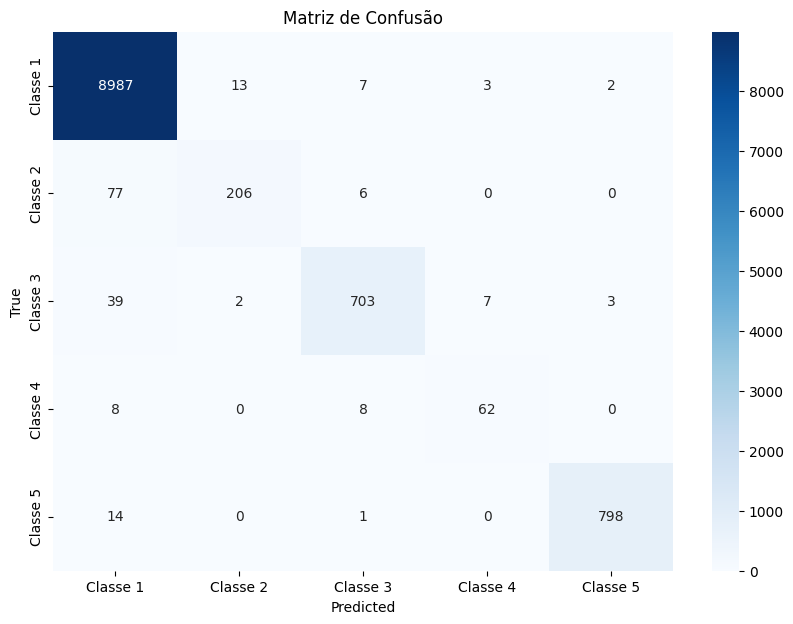

In [117]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_best, annot=True, fmt='g', cmap='Blues', xticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'], yticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Matriz de Confusão')
plt.show()

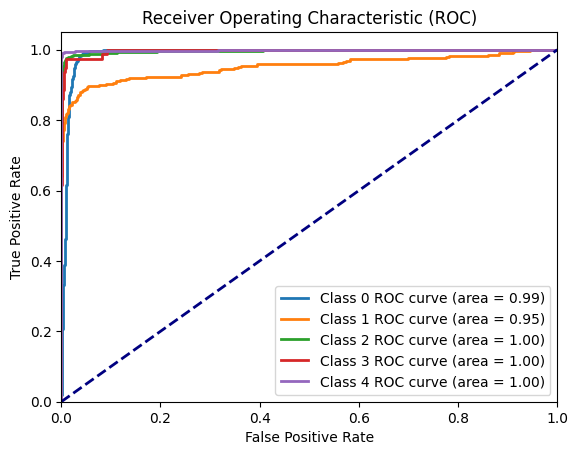

In [116]:
n_classes = len(set(y_test))
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob_best[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [127]:
joblib.dump(best_pipeline, 'svm.joblib')

['svm.joblib']

In [119]:
best_pipeline = joblib.load('svm.joblib')